## Load Data

In [2]:
import pandas as pd 
import numpy as  np 
import pyreadr
import os 

current_wd=os.getcwd()

In [3]:
os.path.dirname(current_wd)

'C:\\Users\\tata\\Documents\\Vanderbilt_research_proj\\PoliScience\\github'

In [5]:
# Load RDS data 
result = pyreadr.read_r(f'{current_wd}/data/AffectivePandemic.Rds') 

df = result[None] # extract the pandas data frame 
df.head()

,StartDate,EndDate,Status,IPAddress,Progress,Duration__in_seconds_,Finished,RecordedDate,ResponseId,RecipientLastName,...,p_LimitedGov,p_LimitedGov1,p_ScienceFear,p_ScienceTooFast,p_Libertarianism,p_SelfReliance,p_StrangerCutLine,p_PutOnShow,h_communityMask,h_communityGroceryMask
0,2021-11-19 13:48:20,2021-11-19 13:53:41,0.0,73.216.114.158,100.0,320.0,1.0,2021-11-19 13:53:41,R_1espJB9ZHIg9ngo,,...,0.0,0.0,-5.0,0.0,-4.0,0.0,0.0,0.0,9.0,0.0
1,2021-11-19 13:47:04,2021-11-19 13:54:37,0.0,108.185.238.236,100.0,452.0,1.0,2021-11-19 13:54:37,R_1Fyz86q35YBQDUI,,...,-1.0,0.0,-5.0,0.0,-5.0,0.0,0.0,0.0,6.0,1.0
2,2021-11-19 13:45:52,2021-11-19 13:55:02,0.0,72.186.41.34,100.0,549.0,1.0,2021-11-19 13:55:02,R_XoWyI6XGT5hdf5T,,...,0.0,1.0,-2.0,0.0,-5.0,0.0,0.0,0.0,9.0,0.0
3,2021-11-19 13:46:25,2021-11-19 13:55:56,0.0,205.154.88.148,100.0,570.0,1.0,2021-11-19 13:55:56,R_87YNShWdZrSGlzP,,...,0.0,0.0,-4.0,0.0,-5.0,0.0,0.0,0.0,6.0,1.0
4,2021-11-19 13:46:08,2021-11-19 13:55:58,0.0,172.58.144.10,100.0,589.0,1.0,2021-11-19 13:55:58,R_29mggzhfSdfqZT6,,...,-1.0,0.0,-2.0,0.0,-3.0,1.0,1.0,0.0,NaN,0.0


In [6]:
len(list((df.columns)))

180

print(list((df.columns)))

## Data Preprocessing

<AxesSubplot:>

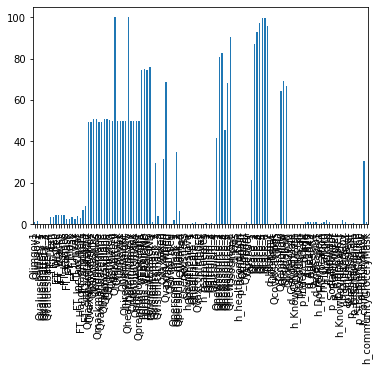

In [22]:
# Check for missingness 
missingness_pct = df.isna().sum()/len(df)*100
missingness_pct
missingness_pct[missingness_pct!=0)].plot(kind='bar')

In [27]:
missingness_pct[missingness_pct!=0]

Qlimgov1                   0.922570
Qlimgov2                   1.482702
Qvaluesbattery_1           0.164745
Qvaluesbattery_2           0.164745
Qvaluesbattery_3           0.230643
                            ...    
p_SelfReliance             0.230643
p_StrangerCutLine          0.296540
p_PutOnShow                0.131796
h_communityMask           30.576606
h_communityGroceryMask     1.054366
Length: 125, dtype: float64

## Setup OpenAI


In [4]:
from openai import OpenAI
import openai

client = OpenAI()
openai.api_key = ''

response = client.chat.completions.create(
  model="gpt-3.5-turbo",
  messages=[
    {"role": "system", "content": "You are a helpful assistant."},
    {"role": "user", "content": "Who won the world series in 2020?"},
    {"role": "assistant", "content": "The Los Angeles Dodgers won the World Series in 2020."},
    {"role": "user", "content": "Where was it played?"}
  ]
) 

In [5]:
response

ChatCompletion(id='chatcmpl-8IUnP8eVFp6pPj1KL1uZ5cWLmPDOa', choices=[Choice(finish_reason='stop', index=0, message=ChatCompletionMessage(content='The World Series in 2020 was played at Globe Life Field in Arlington, Texas.', role='assistant', function_call=None, tool_calls=None))], created=1699418975, model='gpt-3.5-turbo-0613', object='chat.completion', system_fingerprint=None, usage=CompletionUsage(completion_tokens=18, prompt_tokens=53, total_tokens=71))

In [9]:
response = client.completions.create(
  model="gpt-3.5-turbo-instruct",
  prompt="Write a tagline for an ice cream shop."
)

In [10]:
response

Completion(id='cmpl-8IV1i4cpPXL9lxJMr9IFJjTkvb4IC', choices=[CompletionChoice(finish_reason='stop', index=0, logprobs=None, text='\n\n"Scoop up a smile with every cone!"')], created=1699419862, model='gpt-3.5-turbo-instruct', object='text_completion', system_fingerprint=None, usage=CompletionUsage(completion_tokens=10, prompt_tokens=10, total_tokens=20))